In [16]:
### 查看遗漏的直方图

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# 读取excel文件并获取指定列
file_path = '../Data/福彩3D历史开奖_间隔.csv'
COLS_ALL = ['期号', '1号球全局遗漏', '2号球全局遗漏', '3号球全局遗漏', 'test5', 'test7', 'test10']
df = pd.read_csv(file_path,usecols=COLS_ALL, encoding='GBK')
print('读取cvs文件: '+file_path)
print(df)




读取cvs文件: ../Data/福彩3D历史开奖_间隔.csv
           期号  1号球全局遗漏  2号球全局遗漏  3号球全局遗漏  test5  test10  test7
0     2024144        1        1        2    0.0    12.0   12.0
1     2024143        4        1        1    1.0     1.0    1.0
2     2024142        2        8        1    1.0     6.0    6.0
3     2024141        3        0        0    0.0     7.0    7.0
4     2024140        1        4        5    2.0     7.0    7.0
...       ...      ...      ...      ...    ...     ...    ...
3925  2013038        0        0       -1    NaN     NaN    NaN
3926  2013037        2        0       -1    NaN     NaN    NaN
3927  2013036       -1       -1       -1    NaN     NaN    NaN
3928  2013033        0        0        0    NaN     NaN    NaN
3929  2013030       -1       -1       -1    NaN     NaN    NaN

[3930 rows x 7 columns]


In [17]:
# 获取某一列的数据
COLS_Y = ['1号球全局遗漏']
data = df[COLS_Y][:3500]
#data = df['test5'].dropna()
print(data)

      1号球全局遗漏
0           1
1           4
2           2
3           3
4           1
...       ...
3495       12
3496        5
3497        1
3498        1
3499        3

[3500 rows x 1 columns]


d:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
2024-09-04 12:59:55.400 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=2.666546)
2024-09-04 12:59:55.842 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=2.590856)
2024-09-04 12:59:55.912 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.735347)
2024-09-04 12:59:56.001 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=3.157196)
2024-09-04 12:59:56.316 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewnorm distribution with error=2.457922)
2024-09-04 12:5

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.735347,1250.251130,1268.732685,inf,0.418970,0.000000e+00
beta,2.014307,1640.471492,1665.113565,inf,0.350191,0.000000e+00
skewnorm,2.457922,1278.726222,1297.207776,inf,0.270891,2.297610e-227
t,2.590856,1083.780417,1102.261971,inf,0.204550,6.932556e-129
norm,2.666546,1539.742618,1552.063655,inf,0.201008,1.957001e-124


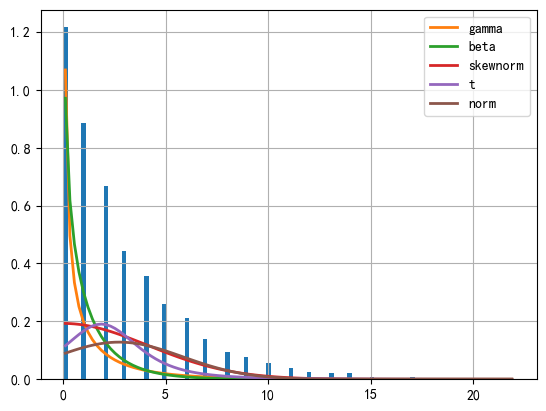

In [18]:
#2# 计算绘制参数

# 计算均值、标准差、中位数
mean = np.mean(data)
std = np.std(data)
median = np.median(data)

# 使用fitter库拟合多种分布
from fitter import Fitter
f = Fitter(data, distributions=['norm', 'skewnorm', 't', 'gamma', 'beta', 'lognorm'])
f.fit()
f.summary() #打印结果

       1号球全局遗漏
0     0.000000
1     1.386294
2     0.693147
3     1.098612
4     0.000000
...        ...
3495  2.484907
3496  1.609438
3497  0.000000
3498  0.000000
3499  1.098612

[2564 rows x 1 columns]


d:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

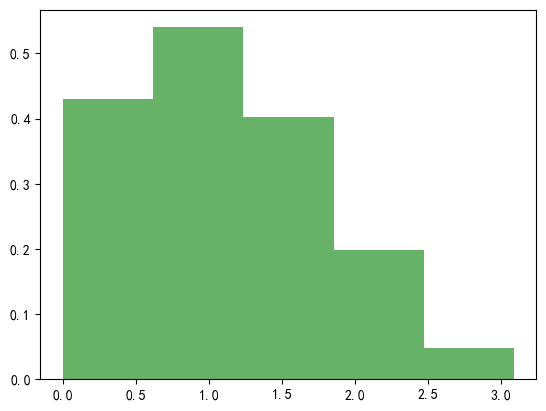

In [21]:
# KS检验
from scipy import stats
from scipy.stats import kstest, lognorm

# 假设data是您要检验的数据
data = data.dropna()  # 确保移除任何 NaN 值
data = data[data > 0]  # 对数正态分布需要正值
log_data = np.log(data)
print(log_data)

# 绘制直方图和正态曲线
plt.hist(log_data, bins=5, density=True, alpha=0.6, color='g')
mu, sigma = np.mean(log_data), np.std(log_data)
x = np.linspace(min(log_data), max(log_data), 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title('Histogram of log-transformed data with normal curve')
plt.show()

# Kolmogorov-Smirnov检验
statistic, p_value = kstest(log_data, 'norm', args=(mu, sigma))
print(f'KS Statistic: {statistic}')
print(f'P-value: {p_value}')

# 判断是否符合正态分布
alpha = 0.05
if p_value > alpha:
    print('数据符合正态分布')
else:
    print('数据不符合正态分布')


In [ ]:
#3# 绘制直方图

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.axvline(mean, color='b', linestyle='--', label='均值') # 绘制均值线（红色线）
plt.axvline(median, color='g', linestyle='--', label='中位数') # 绘制中位数线（绿色线）
                                                                # 绘制众数线(不用画，看最高的直方柱即是)
plt.hist(data, bins=28, density=True, alpha=0.7) # 绘制直方图

# 获取最佳拟合分布的名称和参数
best_fit = f.get_best(method='sumsquare_error')
best_fit_name = list(best_fit.keys())[0]
best_fit_params = best_fit[best_fit_name]
# 打印调试信息
print("最佳拟合分布名称:", best_fit_name)
print("最佳拟合分布参数:", best_fit_params)
      
from scipy.stats import norm, skewnorm, t, gamma, beta, lognorm

# 创建映射从分布名称到实际的分布对象
distribution_map = {
    'norm': norm,
    'skewnorm': skewnorm,
    't': t,
    'gamma': gamma,
    'beta': beta,
    'lognorm': lognorm
}
# 计算直方图相关参数
hist, bins = np.histogram(data, bins=28, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# 计算拟合曲线的值
bin_centers = (bins[1:] + bins[:-1]) / 2
dist = distribution_map[best_fit_name]
pdf_values = dist.pdf(bin_centers, **best_fit_params)

plt.plot(bin_centers, pdf_vkwalues, 'r-', lw=2, label=best_fit_name) # 绘制拟合曲线
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('整体遗漏分布'+' ('+best_fit_name+'分布) ')
plt.legend()
plt.show()